In [59]:
#install pandas
!pip install pandas

In [60]:
#install encoder
!pip install category_encoders

In [61]:
#All imported libraries
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sympy
import category_encoders as ce
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif


In [62]:
#call the file from oringinal path
# csv_file_path ='Churn_Modelling_26.csv'
csv_file_path ='C:/Users/princ/Downloads/Churn_Modelling_26.csv'

In [63]:
#read the path of the file using csv, give full access to the data
df = pd.read_csv(csv_file_path)

In [64]:
df              #Section 1 sub-section a

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Unnamed: 11,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.000000,0.00,1.0,101348.88,NaN,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.000000,83807.86,1.0,112542.58,NaN,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.000000,159660.80,3.0,113931.57,NaN,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.000000,0.00,2.0,93826.63,NaN,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.000000,125510.82,1.0,79084.10,NaN,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.000000,57369.61,1.0,101699.77,NaN,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.000000,0.00,1.0,42085.58,NaN,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.000000,75075.31,2.0,92888.52,NaN,Yes,No,1.0
9999,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.000000,130142.79,1.0,38190.78,NaN,Yes,No,0.0


In [65]:
df.iloc[10000]

RowNumber               NaN
CustomerId              NaN
Surname                 NaN
CreditScore             NaN
Geography               NaN
Gender                  NaN
Age                     NaN
Tenure             5.012814
Balance                 NaN
NumOfProducts           NaN
EstimatedSalary         NaN
Unnamed: 11             NaN
HasCrCard               NaN
IsActiveMember          NaN
Churn                   NaN
Name: 10000, dtype: object

In [66]:
df = df.drop(10000).reset_index(drop=True)        #Column Descriptions:The dataset contains information about bank customers.
df = df.drop(columns=['Unnamed: 11'])              #Each row represents a customer, and each column represents a specific attribute or feature. 
df                                                 #Droped the unnamed column.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,101348.88,Yes,Yes,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,112542.58,No,Yes,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,113931.57,Yes,No,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,93826.63,No,No,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,79084.10,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,96270.64,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,101699.77,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,709.0,France,Female,36.0,7.0,0.00,1.0,42085.58,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,92888.52,Yes,No,1.0


In [67]:
print(df.dtypes)   #the dataset contains various attributes related to bank customers.
                   #Each column has a specific data type, which determines the kind of values it can hold.

RowNumber          float64
CustomerId         float64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
HasCrCard           object
IsActiveMember      object
Churn              float64
dtype: object


In [68]:
#converting object type to categorical type using the astype function
columns_to_convert =['Surname','Geography','Gender','HasCrCard','IsActiveMember']
for col in columns_to_convert:
    df[col] =\
    df[col].astype('category')      #Section 1 sub a

print(df.dtypes)

RowNumber           float64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
EstimatedSalary     float64
HasCrCard          category
IsActiveMember     category
Churn               float64
dtype: object


In [69]:
#called the full information of the whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  float64 
 1   CustomerId       10000 non-null  float64 
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  float64 
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  float64 
 7   Tenure           9989 non-null   float64 
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
 11  HasCrCard        10000 non-null  category
 12  IsActiveMember   10000 non-null  category
 13  Churn            10000 non-null  float64 
dtypes: category(5), float64(9)
memory usage: 849.8 KB


In [70]:
#called the missing values in the full dataset   #Section 1 SUB b
missing_values = df.isna()      #Each column (feature) has been checked for data integrity (whether it contains missing values or not).                                
print(missing_values)           #The output shows False for each column, indicating that there are no missing values (all values are complete).

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  EstimatedSala

In [71]:
#The output shows the count of missing values (NaN or null) for each column.
#summaried the missing values
missing_values_summary =\
df.isna().sum()
print(missing_values_summary)      

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             11
Balance             0
NumOfProducts       0
EstimatedSalary     0
HasCrCard           0
IsActiveMember      0
Churn               0
dtype: int64


In [72]:
#calculate mean of tenure and print the column
column_mean = df['Tenure'].mean()
print(f"Mean of the column\
'Tenure': {column_mean}")

Mean of the column'Tenure': 5.012814095505056


In [73]:
#replacing the missing values in tenure with the mean
df['Tenure'] = df['Tenure'].fillna(column_mean)

In [74]:
#summaried the missing values
missing_values_summary =\
df.isna().sum()
print(missing_values_summary)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Churn              0
dtype: int64


In [75]:
#to show duplicate rows... its false meaning there are no duplicates
duplicates = df.duplicated()
print(duplicates)                #Section 2 sub A

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


Text(0.5, 1.0, 'Boxplot of Numeric Features')

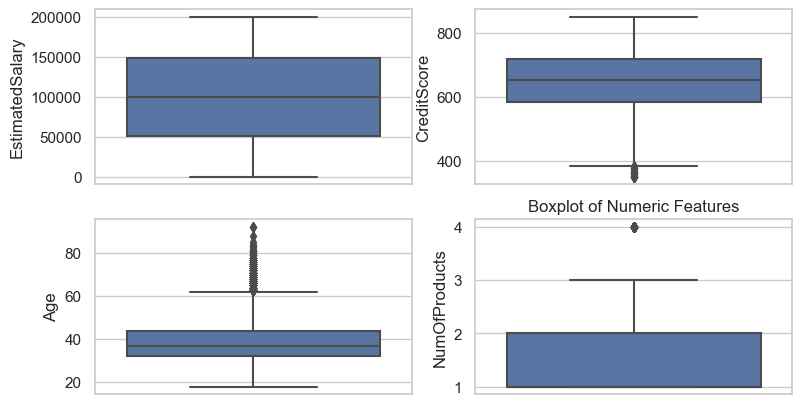

In [76]:
plt.figure(figsize=(9,5))                           #Section 2 sub B

plt.subplot(2,2,1)
sns.boxplot(y='EstimatedSalary', data=df)

plt.subplot(2,2,2)
sns.boxplot(y='CreditScore', data=df)     #The box itself shows the interquartile range (IQR), with the median salary marked by a horizontal line inside the box.

plt.subplot(2,2,3) 
sns.boxplot(y='Age', data=df)         #  Whiskers extend from the box to the minimum and maximum values within a certain range (excluding outliers).

plt.subplot(2,2,4)
sns.boxplot(y='NumOfProducts', data=df) 

plt.title('Boxplot of Numeric Features')


C:\Users\princ\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

Text(0.5, 1.0, 'Countplot For Categorical Features')

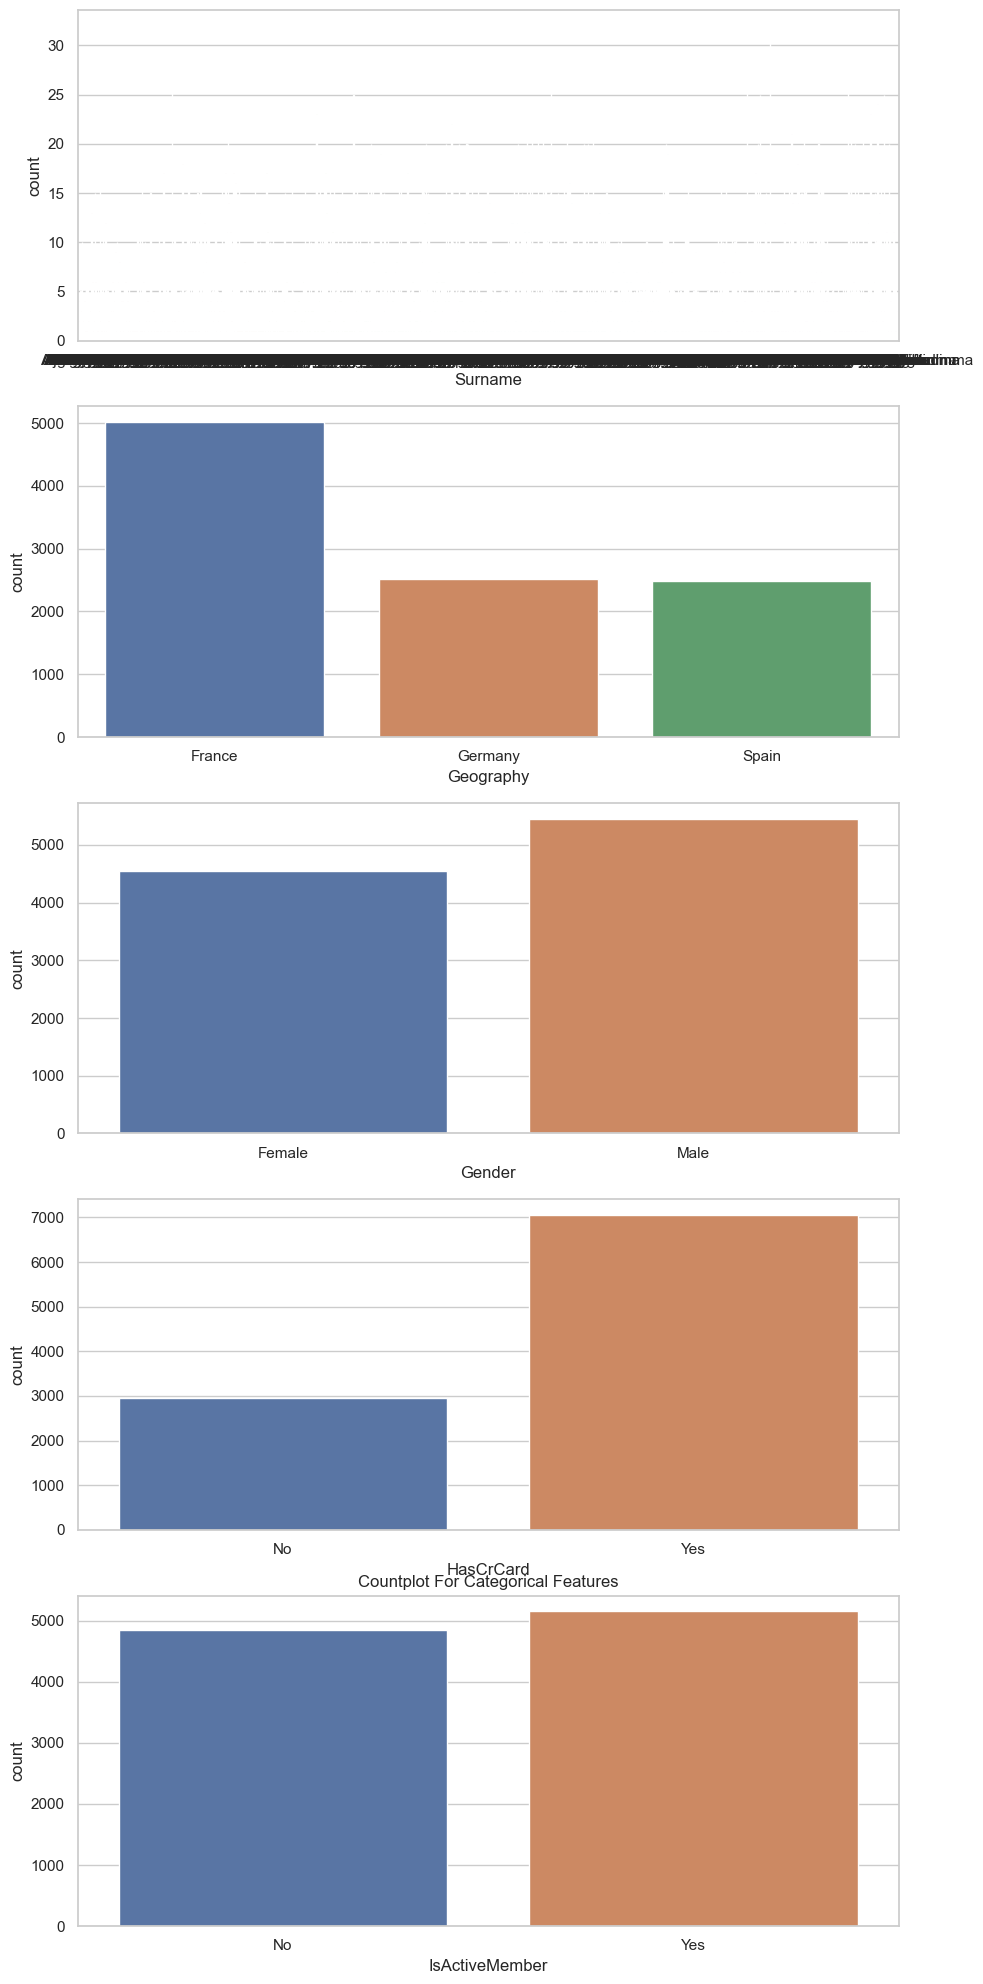

In [77]:
fig, axes = plt.subplots(5,1, figsize=(10, 20))    #Section 2 sub C

sns.countplot(x='Surname', data=df, ax=axes[0])
sns.countplot(x='Geography', data=df, ax=axes[1])
sns.countplot(x='Gender', data=df, ax=axes[2])
sns.countplot(x='HasCrCard', data=df, ax=axes[3])
sns.countplot(x='IsActiveMember', data=df, ax=axes[4])

plt.tight_layout()

plt.title('Countplot For Categorical Features')

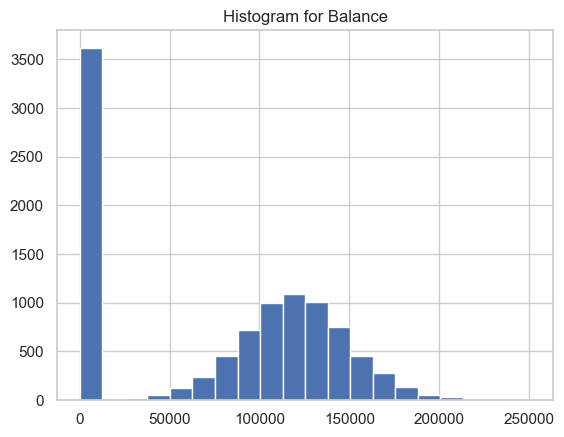

In [78]:
#Since 'df' is my dataframe and its already loaded with the data
numeric_features = df.select_dtypes(include=[np.number])          #Section 2 sub D
#Draw histograms for numeric features
plt.figure()                                #The histogram shows a right-skewed distribution.
numeric_features['Balance'].hist(bins=20)  #As the balance amount increases, the number of occurrences decreases.
plt.title ('Histogram for Balance')
plt.show()                               #this distribution suggests that a significant proportion of accounts or individuals have relatively low balances.
#Compute the skewness
skewness = skew(numeric_features['Balance'])

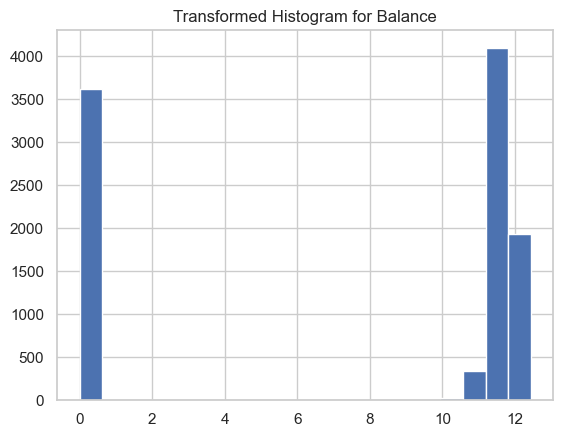

In [79]:
#Apply the transformationnif needed  
transformed = np.log1p(numeric_features['Balance']) 
plt.figure()
transformed.hist(bins=20)
plt.title(f'Transformed Histogram for Balance')
plt.show()

C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


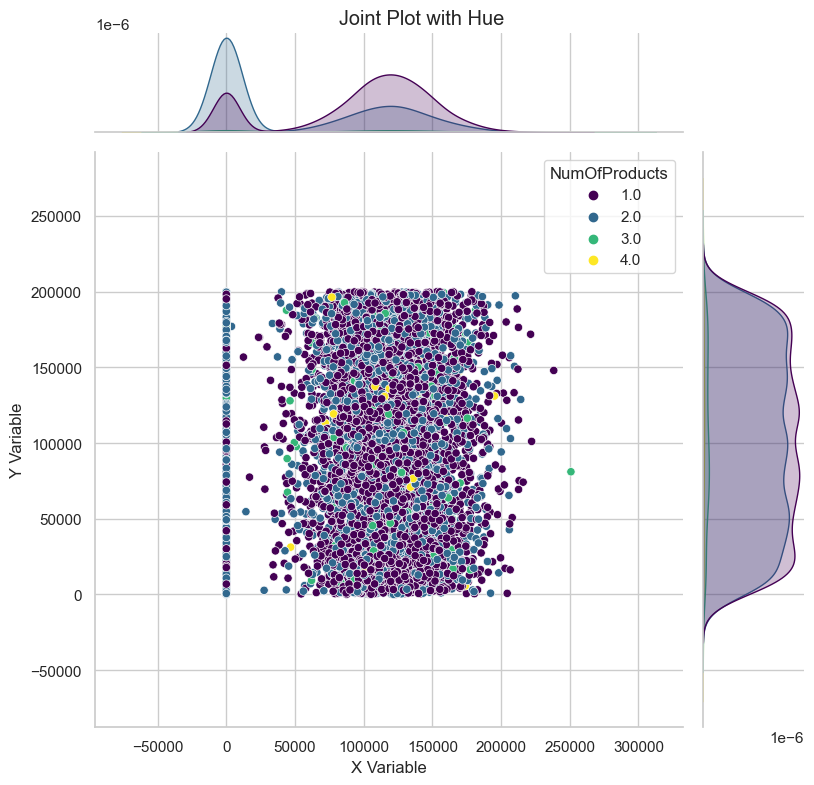

In [80]:
#replace 'x_var', 'y_var','hue_var' with the actual column names from dataframe
sns.set(style="whitegrid")
#create a joint plot with a hue paremeter
g = sns.jointplot(
        x='Balance',                                       #Section 3 Sub A
     
        y='EstimatedSalary',
     
        data=df,
     
        kind='scatter',
     
        hue='NumOfProducts',         #the ‘NumOfProducts’ categories are distributed across the data points.
     
        palette='viridis',
     
        height=8
)    
g.fig.suptitle('Joint Plot with Hue')

g.set_axis_labels('X Variable', 'Y Variable', fontsize=12)

plt.subplots_adjust(top=0.95)

plt.show()
    

C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

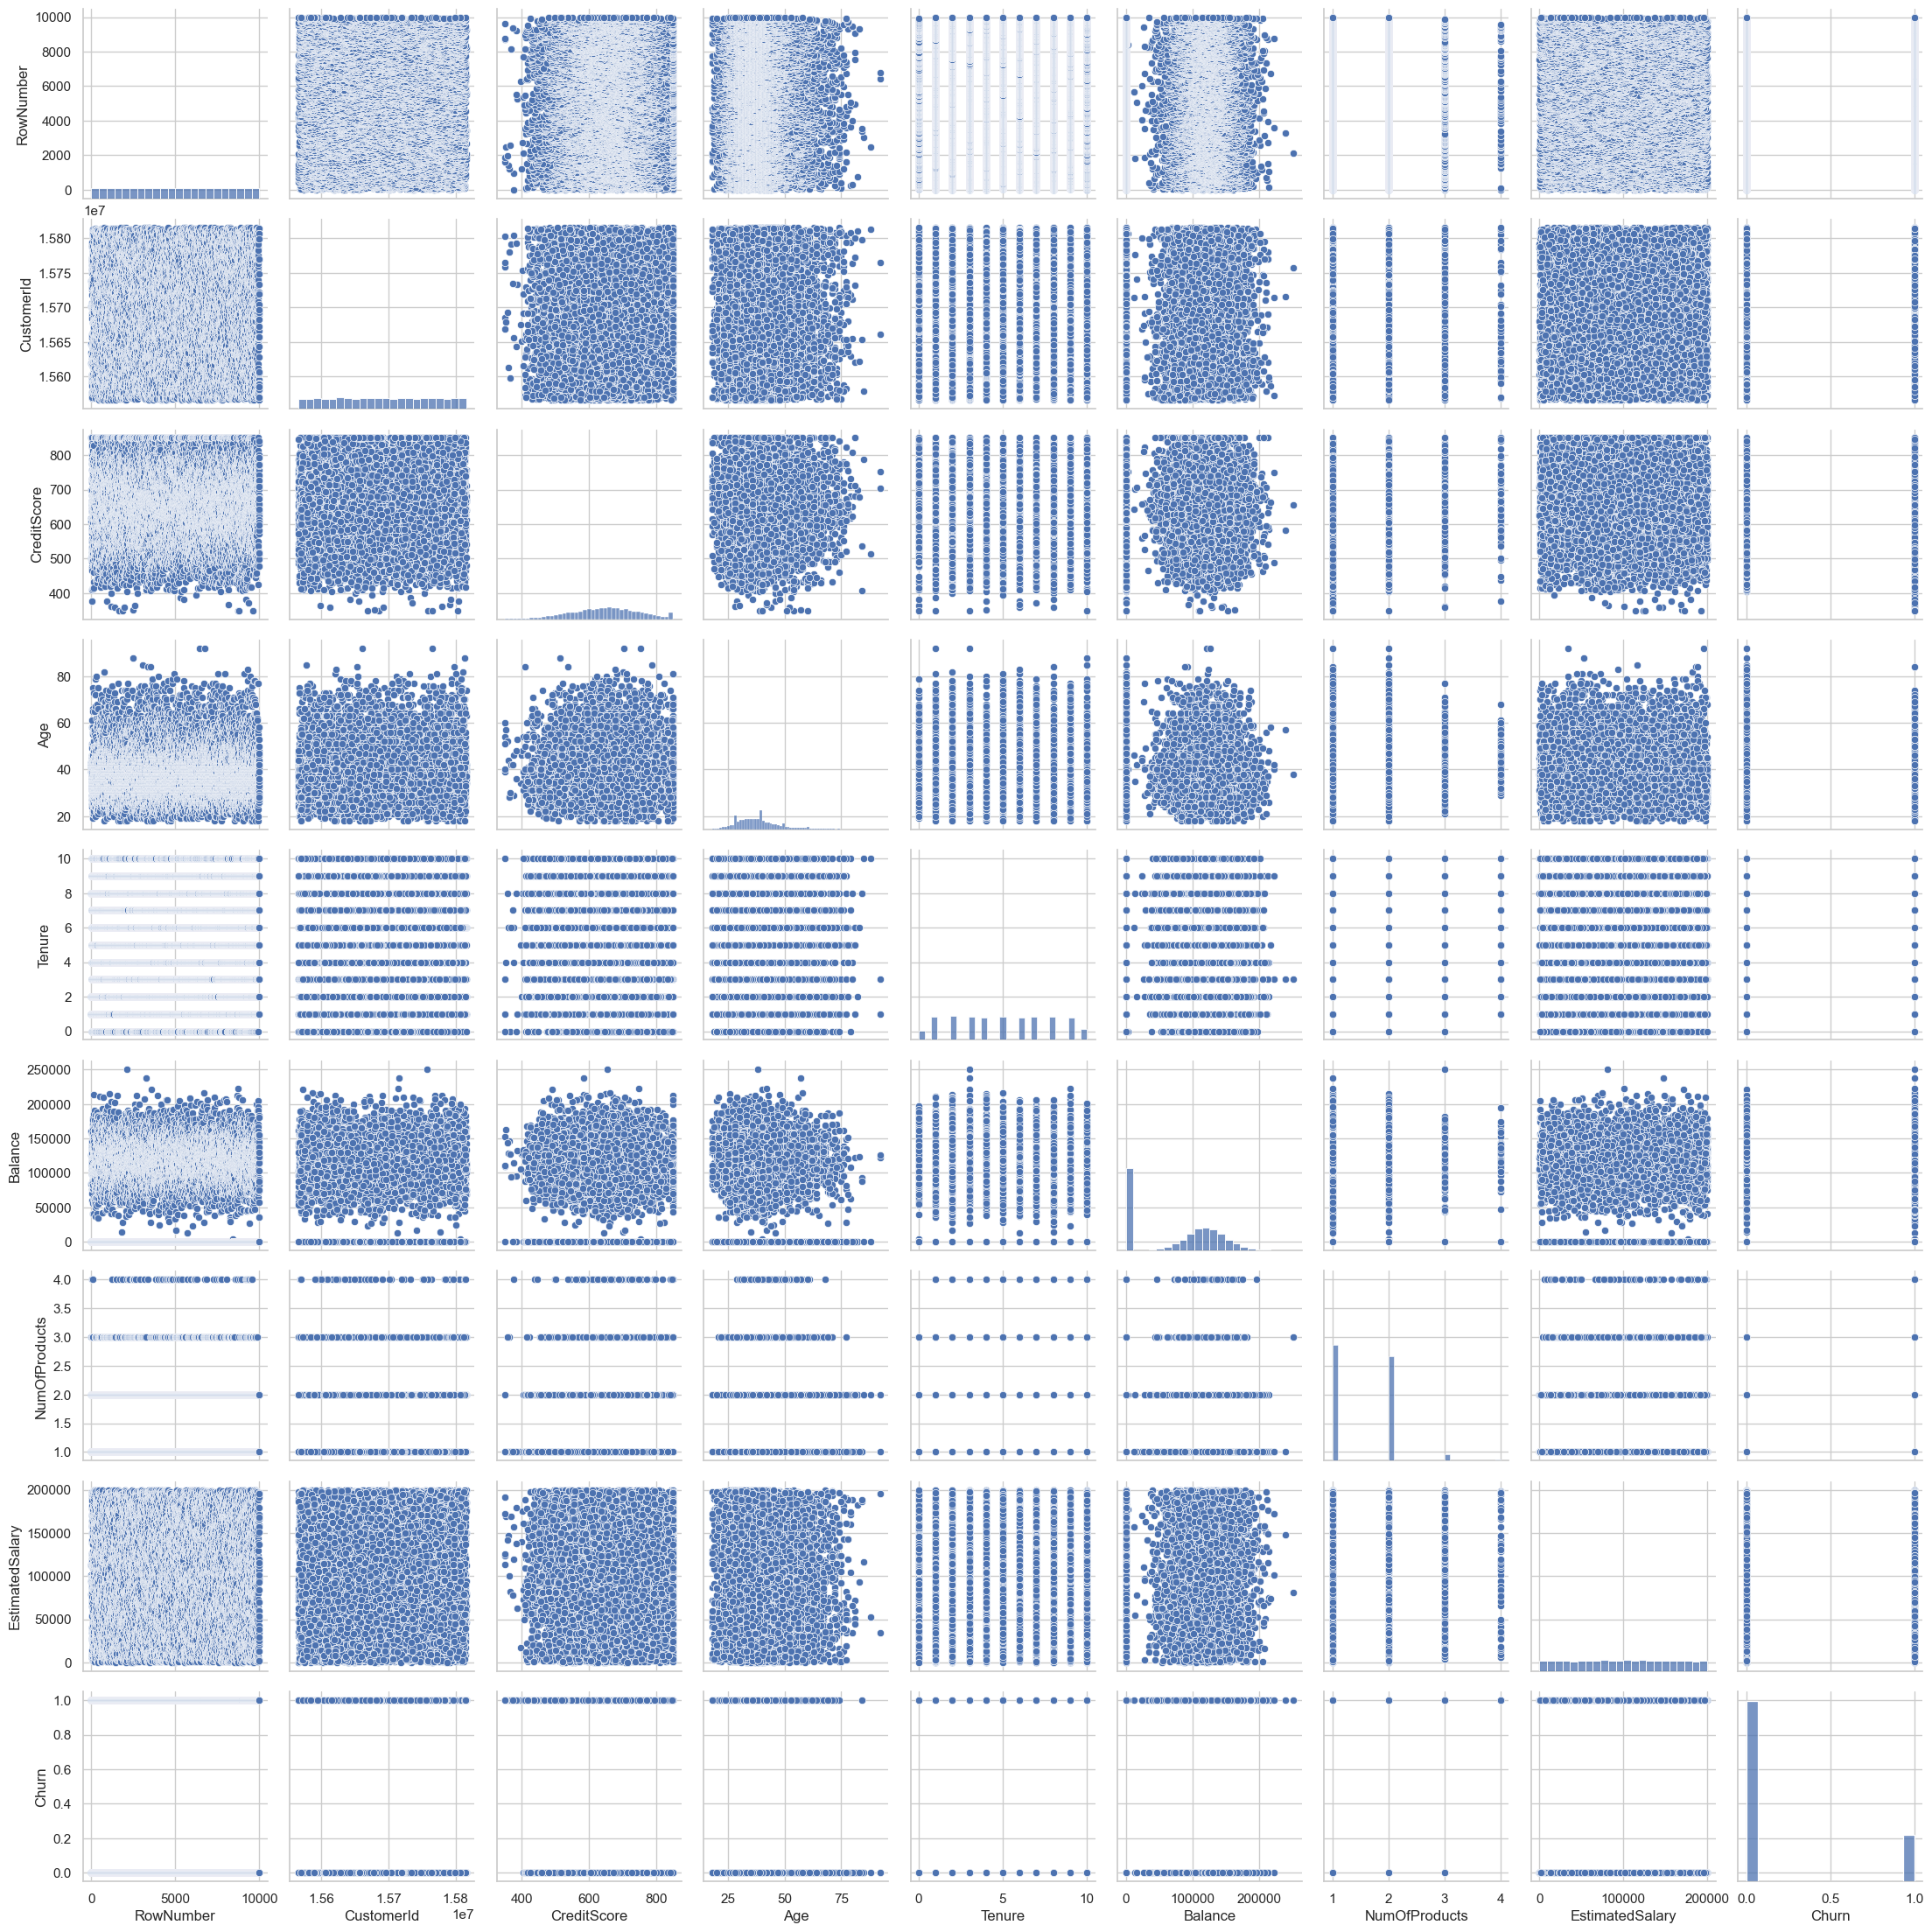

In [81]:
sns.pairplot(df)

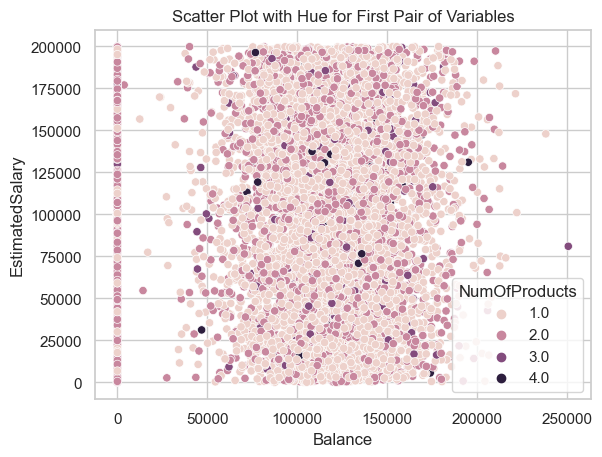

In [82]:
# Scatter plot for the first pair of variables with a hue
sns.scatterplot(data=df,                                       #Section 3 sub B
                x='Balance', 
                y='EstimatedSalary',    #Each data point represents an observation related to both the balance and estimated salary.
                hue='NumOfProducts')
plt.title('Scatter Plot with Hue for First Pair of Variables')
plt.show()

In [83]:
scaler=MinMaxScaler()                        #Section 3 sub C
Dscale=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
Sec_Scale=scaler.fit_transform(Dscale)
print(Sec_Scale)
Return_Dataframe=pd.DataFrame(Sec_Scale, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
print(Sec_Scale[0:10,:])
for data in Return_Dataframe.columns:
    df[data]=Return_Dataframe[data]

df

[[0.538      0.32432432 0.2        0.         0.         0.50673489]
 [0.516      0.31081081 0.1        0.33403148 0.         0.56270874]
 [0.304      0.32432432 0.8        0.63635718 0.66666667 0.56965435]
 ...
 [0.718      0.24324324 0.7        0.         0.         0.21039009]
 [0.844      0.32432432 0.3        0.29922631 0.33333333 0.46442905]
 [0.884      0.13513514 0.4        0.51870777 0.         0.19091423]]
[[0.538      0.32432432 0.2        0.         0.         0.50673489]
 [0.516      0.31081081 0.1        0.33403148 0.         0.56270874]
 [0.304      0.32432432 0.8        0.63635718 0.66666667 0.56965435]
 [0.698      0.28378378 0.1        0.         0.33333333 0.46912005]
 [1.         0.33783784 0.2        0.50024622 0.         0.39540036]
 [0.59       0.35135135 0.8        0.45339436 0.33333333 0.74879716]
 [0.944      0.43243243 0.7        0.         0.33333333 0.0502609 ]
 [0.052      0.14864865 0.4        0.45853972 1.         0.59673349]
 [0.302      0.35135135 0.4 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,0.538,France,Female,0.324324,0.2,0.000000,0.000000,0.506735,Yes,Yes,1.0
1,2.0,15647311.0,Hill,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.562709,No,Yes,0.0
2,3.0,15619304.0,Onio,0.304,France,Female,0.324324,0.8,0.636357,0.666667,0.569654,Yes,No,1.0
3,4.0,15701354.0,Boni,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.469120,No,No,0.0
4,5.0,15737888.0,Mitchell,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,0.395400,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,0.842,France,Male,0.283784,0.5,0.000000,0.333333,0.481341,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,0.332,France,Male,0.229730,1.0,0.228657,0.000000,0.508490,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0.210390,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,0.464429,Yes,No,1.0


In [84]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Churn
0,1.0,15634602.0,Hargrave,0.538,France,Female,0.324324,0.2,0.000000,0.000000,0.506735,Yes,Yes,1.0
1,2.0,15647311.0,Hill,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.562709,No,Yes,0.0
2,3.0,15619304.0,Onio,0.304,France,Female,0.324324,0.8,0.636357,0.666667,0.569654,Yes,No,1.0
3,4.0,15701354.0,Boni,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.469120,No,No,0.0
4,5.0,15737888.0,Mitchell,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,0.395400,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,Obijiaku,0.842,France,Male,0.283784,0.5,0.000000,0.333333,0.481341,Yes,No,0.0
9996,9997.0,15569892.0,Johnstone,0.332,France,Male,0.229730,1.0,0.228657,0.000000,0.508490,Yes,Yes,0.0
9997,9998.0,15584532.0,Liu,0.718,France,Female,0.243243,0.7,0.000000,0.000000,0.210390,No,Yes,1.0
9998,9999.0,15682355.0,Sabbatini,0.844,Germany,Male,0.324324,0.3,0.299226,0.333333,0.464429,Yes,No,1.0


In [85]:
#Section 3 SUB D
#Churn refers to customers leaving or discontinuing their services.
Category = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# One-hot encoding the 'Category' columns
one_hot_encoded_data = pd.get_dummies(df, columns= Category )

print(one_hot_encoded_data)

      RowNumber  CustomerId  CreditScore       Age  Tenure   Balance  \
0           1.0  15634602.0        0.538  0.324324     0.2  0.000000   
1           2.0  15647311.0        0.516  0.310811     0.1  0.334031   
2           3.0  15619304.0        0.304  0.324324     0.8  0.636357   
3           4.0  15701354.0        0.698  0.283784     0.1  0.000000   
4           5.0  15737888.0        1.000  0.337838     0.2  0.500246   
...         ...         ...          ...       ...     ...       ...   
9995     9996.0  15606229.0        0.842  0.283784     0.5  0.000000   
9996     9997.0  15569892.0        0.332  0.229730     1.0  0.228657   
9997     9998.0  15584532.0        0.718  0.243243     0.7  0.000000   
9998     9999.0  15682355.0        0.844  0.324324     0.3  0.299226   
9999    10000.0  15628319.0        0.884  0.135135     0.4  0.518708   

      NumOfProducts  EstimatedSalary  Churn  Surname_Abazu  ...  \
0          0.000000         0.506735    1.0          False  ...   
1

In [86]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Category' column
category_encoded = encoder.fit_transform(df[Category])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(Category)
df_encoded = pd.DataFrame(category_encoded, columns=encoded_feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_final = pd.concat([df.drop(columns=Category), df_encoded], axis=1)

df_final

C:\Users\princ\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn,Surname_Abazu,...,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes
0,1.0,15634602.0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2.0,15647311.0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,15619304.0,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4.0,15701354.0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,15737888.0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,9997.0,15569892.0,0.332,0.229730,1.0,0.228657,0.000000,0.508490,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,9998.0,15584532.0,0.718,0.243243,0.7,0.000000,0.000000,0.210390,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,9999.0,15682355.0,0.844,0.324324,0.3,0.299226,0.333333,0.464429,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


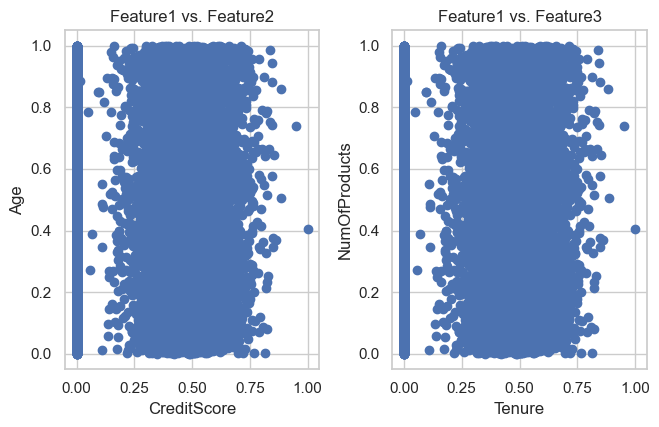

In [87]:
#Section 4 sub A
# Create column names
columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create a DataFrame
df_scaled = pd.DataFrame(df_final, columns=columns)

# Create scatter plots
plt.figure(figsize=(10, 8))

# Scatter plot for Feature1 vs. Feature2
plt.subplot(2, 3, 1)
plt.scatter(df_final['Balance'], df_final['EstimatedSalary'])
plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.title('Feature1 vs. Feature2')

# Scatter plot for Feature1 vs. Feature3
plt.subplot(2, 3, 2)
plt.scatter(df_final['Balance'], df_final['EstimatedSalary'])
plt.xlabel('Tenure')
plt.ylabel('NumOfProducts')
plt.title('Feature1 vs. Feature3')

# Show the plots
plt.tight_layout()
plt.show()

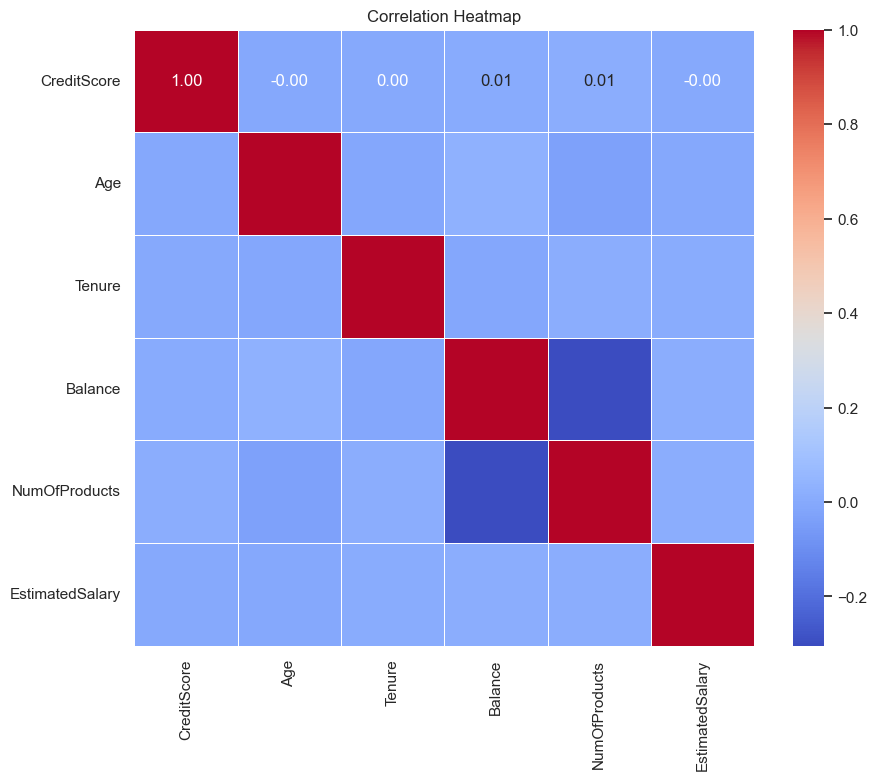

In [88]:
# Assuming you have your DataFrame 'df_scaled' with the scaled features          #Section 4 Sub B
correlation_matrix = df_scaled.corr()

# Optional: Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Optional: Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [89]:
df_final

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Churn,Surname_Abazu,...,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_No,IsActiveMember_Yes
0,1.0,15634602.0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,2.0,15647311.0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,15619304.0,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4.0,15701354.0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,15737888.0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,15606229.0,0.842,0.283784,0.5,0.000000,0.333333,0.481341,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
9996,9997.0,15569892.0,0.332,0.229730,1.0,0.228657,0.000000,0.508490,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
9997,9998.0,15584532.0,0.718,0.243243,0.7,0.000000,0.000000,0.210390,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9998,9999.0,15682355.0,0.844,0.324324,0.3,0.299226,0.333333,0.464429,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [90]:
#Section 4 sub C
#let’s consider the “Age” feature:
#It has a positive correlation with the target variable (presumably).
#A correlation coefficient of 0.32 indicates a moderate positive relationship.
#As age increases, the target variable (e.g., customer churn, purchase behavior, etc.) tends to increase.
# Remove rows with NaN values
df_cleaned = df_final.dropna(subset=['Churn'])

# Calculate correlations using Spearman's rank correlation
correlations = {}
for feature in df_cleaned.columns:
    if feature != 'Churn':  # Exclude the dependent variable explicitly
        corr, _ = spearmanr(df_cleaned[feature], df_cleaned['Churn'])
        correlations[feature] = corr

# Create a DataFrame to display the results
correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])

print(correlation_df)

                 Feature  Correlation
0              RowNumber    -0.016571
1             CustomerId    -0.006264
2            CreditScore    -0.023289
3                    Age     0.323968
4                 Tenure    -0.014033
...                  ...          ...
2944         Gender_Male    -0.106512
2945        HasCrCard_No     0.007138
2946       HasCrCard_Yes    -0.007138
2947   IsActiveMember_No     0.156128
2948  IsActiveMember_Yes    -0.156128

[2949 rows x 2 columns]


In [91]:
#Section 4 sub D
# Create a list of features with correlation greater than 0.1
selected_features = high_correlation_features = correlation_df[correlation_df['Correlation'].abs() > 0.1]['Feature'].tolist()

# selected_features[selected_features > threshold]
selected_features

['Age',
 'Balance',
 'NumOfProducts',
 'Geography_France',
 'Geography_Germany',
 'Gender_Female',
 'Gender_Male',
 'IsActiveMember_No',
 'IsActiveMember_Yes']

In [92]:

# Create a new DataFrame with the selected features
df_selected = df_final[selected_features]

print(df_selected.head())  # Display the selected features

        Age   Balance  NumOfProducts  Geography_France  Geography_Germany  \
0  0.324324  0.000000       0.000000               1.0                0.0   
1  0.310811  0.334031       0.000000               0.0                0.0   
2  0.324324  0.636357       0.666667               1.0                0.0   
3  0.283784  0.000000       0.333333               1.0                0.0   
4  0.337838  0.500246       0.000000               0.0                0.0   

   Gender_Female  Gender_Male  IsActiveMember_No  IsActiveMember_Yes  
0            1.0          0.0                0.0                 1.0  
1            1.0          0.0                0.0                 1.0  
2            1.0          0.0                1.0                 0.0  
3            1.0          0.0                1.0                 0.0  
4            1.0          0.0                0.0                 1.0  


In [93]:
#Section 5 sub A
#'X' contains features and 'y' contains the target variable ('Churn')
X, y = df_selected, df_final['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forests classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test dataset
preds = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(preds, y_test))
print("Classification Report:\n", classification_report(y_test, preds))

Accuracy: 0.8435
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      1607
         1.0       0.63      0.50      0.56       393

    accuracy                           0.84      2000
   macro avg       0.76      0.72      0.73      2000
weighted avg       0.83      0.84      0.84      2000



In [95]:
#Section 5 sub B/C
X = df_final.drop(columns=['Churn'])  # Features
y = df_final['Churn']  # Target variable

# Initialize SelectKBest with f_classif scoring function
k_best = SelectKBest(score_func=f_classif, k=5)

# Fit and transform the features
X_selected = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

print("Selected features:")
print(selected_features)

Selected features:
Index(['Age', 'Balance', 'Geography_Germany', 'IsActiveMember_No',
       'IsActiveMember_Yes'],
      dtype='object')
